In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
engine.execute('SELECT max(date) FROM measurement').fetchall()

[('2017-08-23',)]

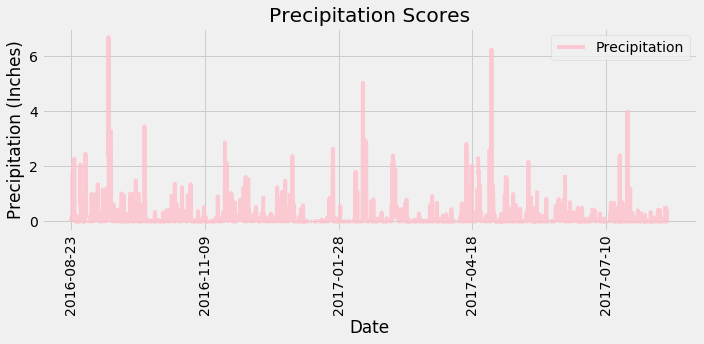

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last12months = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
dataprecipscores = session.query(measurement.date, measurement.prcp).filter(measurement.date >= last12months).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
scores_df = pd.DataFrame(dataprecipscores, columns = ['Date', 'Precipitation'])

# Sort the dataframe by date
scores_df = scores_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
scores_df.plot(x = 'Date', y = 'Precipitation', alpha = 0.8, figsize = (10, 5), color = 'pink')

# Set textual properties
plt.title("Precipitation Scores")
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")

# Format x axis headers vertically
plt.xticks(rotation = 90)

# Resize plot to display labels
plt.tight_layout()

plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
scores_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
session.query(station.id).count()

9

In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stationactivity = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station)).all()

# Most active station
mostactivestation = 'USC00519281'

stationactivity

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperatures = session.query(func.avg(measurement.tobs), func.min(measurement.tobs), func.max(measurement.tobs)).filter(measurement.station == mostactivestation).all()

temperatures

[(71.66378066378067, 54.0, 85.0)]

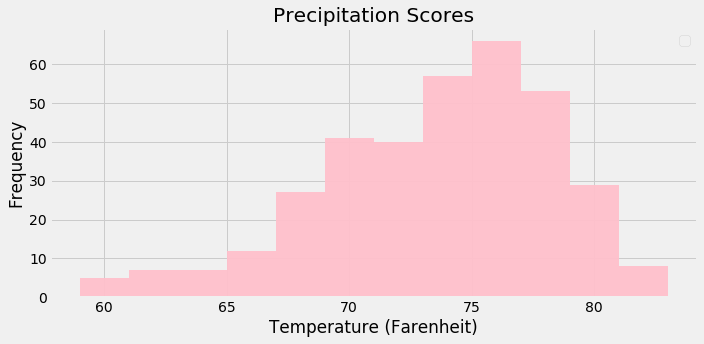

In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp12months_df = pd.DataFrame(session.query(measurement.date, measurement.tobs).filter(measurement.date >= last12months).filter(measurement.station == mostactivestation).all())

# Histogram plot
temp12months_df.plot.hist(bins = 12, alpha = 0.95, figsize = (10, 5), color = 'pink')

# Set textual properties
plt.title("Precipitation Scores")
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("Frequency")

# Remove legend
plt.legend('')

# Resize plot to display labels
plt.tight_layout()

plt.show()

# Close session

In [ ]:
# Close Session
session.close()